In [2]:
import os
from os.path import isdir, join
from pathlib import Path

#Scientific Library
import numpy as np
import pandas as pd
from sklearn import metrics
import glob
import seaborn as sns
import cv2
from tensorflow.python.data import Dataset

# Visualization Library
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from PIL import Image

%matplotlib inline

### Initially, must change wav files into spectro.pngs using Sox using scripts

* convert.sh -> convert wav into spectro with adjustable sizes on -y and -x
* resize.sh -> in case if one wants to resize the spectro pngs. (for ex, from 160 to 96 for less computation)
* mash.sh -> Putting 4 waves into 1 wave and turn it into spectro. (This is for one of the models and final model used "stichted spectrogram" rather than 1 spectrogram with 4 waves already merged)
* rename.sh -> to differentiate each channel wav files, renaming every file from e.g.) 00000.wav -> a00000.wav

In [3]:
!ls

70percent_6000steps.PNG		    c_vocal
73percent_4000steps.png		    cnn_classifier_subvocal
79percent_6000steps.PNG		    d_vocal
Work_v0.ipynb			    data
Work_v1.ipynb			    e_10conv_vocal
Work_v2_70per_at_6000steps.ipynb    f_18_conv_vocal
Work_v3_79per_at_6000steps.ipynb    g_9conv_7pool_vocal
Work_v4_18conv_negative.ipynb	    h_8conv_7pool_vocal
Work_v5_9conv_7pool.ipynb	    i_10conv_9pool_pca
Work_v6.ipynb			    input
Work_v7_back_to_stiched_data.ipynb  original_data
a_vocal				    terminal_tools
b_vocal


In [4]:
ch1 = os.listdir('./input/one/ch1')
ch2 = os.listdir('./input/one/ch2')
ch3 = os.listdir('./input/one/ch3')
ch4 = os.listdir('./input/one/ch4')
ch5 = os.listdir('./input/two/ch1')
ch6 = os.listdir('./input/two/ch2')
ch7 = os.listdir('./input/two/ch3')
ch8 = os.listdir('./input/two/ch4')

In [5]:
print(len(ch1))
print(len(ch2))
print(len(ch3))
print(len(ch4))
print(len(ch5))
print(len(ch6))
print(len(ch7))
print(len(ch8))

1017
1017
1017
1017
1017
1017
1017
1017


In [6]:
print(1017*4)
print(1017*8)

4068
8136


(160, 160, 3)


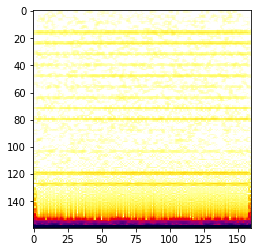

In [7]:
a=plt.imread('./input/one/ch1/' + ch1[0])
print(a.shape)
plt.imshow(a)

In [8]:
ch1_data = np.empty((1017,160,160,3), dtype=np.float32)
ch2_data = np.empty((1017,160,160,3), dtype=np.float32)
ch3_data = np.empty((1017,160,160,3), dtype=np.float32)
ch4_data = np.empty((1017,160,160,3), dtype=np.float32)
ch5_data = np.empty((1017,160,160,3), dtype=np.float32)
ch6_data = np.empty((1017,160,160,3), dtype=np.float32)
ch7_data = np.empty((1017,160,160,3), dtype=np.float32)
ch8_data = np.empty((1017,160,160,3), dtype=np.float32)

index = 0
image_name_list = ch1
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch1/' + image_name)
    ch1_data[index] = imageA
    index+=1
    
index = 0
image_name_list = ch2
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch2/' + image_name)
    ch2_data[index] = imageA
    index+=1

index = 0
image_name_list = ch3
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch3/' + image_name)
    ch3_data[index] = imageA
    index+=1

index = 0
image_name_list = ch4
for image_name in image_name_list:
    imageA = plt.imread('./input/one/ch4/' + image_name)
    ch4_data[index] = imageA
    index+=1
    
index = 0
image_name_list = ch5
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch1/' + image_name)
    ch5_data[index] = imageA
    index+=1
    
index = 0
image_name_list = ch6
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch2/' + image_name)
    ch6_data[index] = imageA
    index+=1

index = 0
image_name_list = ch7
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch3/' + image_name)
    ch7_data[index] = imageA
    index+=1

index = 0
image_name_list = ch8
for image_name in image_name_list:
    imageA = plt.imread('./input/two/ch4/' + image_name)
    ch8_data[index] = imageA
    index+=1

In [9]:
print(type(ch1_data))
print(ch1_data.shape)
print(type(ch2_data))
print(ch2_data.shape)
print(type(ch3_data))
print(ch3_data.shape)
print(type(ch4_data))
print(ch4_data.shape)
print(type(ch5_data))
print(ch1_data.shape)
print(type(ch6_data))
print(ch2_data.shape)
print(type(ch7_data))
print(ch3_data.shape)
print(type(ch8_data))
print(ch4_data.shape)

<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)
<class 'numpy.ndarray'>
(1017, 160, 160, 3)


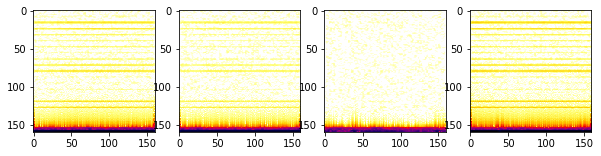

In [10]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,4,1)
plt.imshow(ch1_data[1])
f.add_subplot(1,4,2)
plt.imshow(ch2_data[1])
f.add_subplot(1,4,3)
plt.imshow(ch3_data[1])
f.add_subplot(1,4,4)
plt.imshow(ch4_data[1])

### Here is what I will do for data manipulation
* ch1 and ch2 horizontally -> call it top_ch
* ch3 and ch4 horizontally -> call it bottom_ch
* then, top_ch and bottom_ch vertically with top being on top
* this would be ---- (1, 2)
* same as ---------- (3, 4)

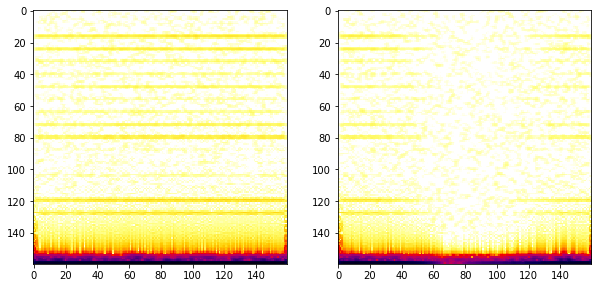

In [11]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(ch1_data[0])
f.add_subplot(1,2,2)
plt.imshow(ch2_data[0])

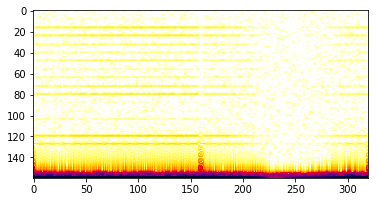

In [12]:
c = np.hstack((ch1_data[0], ch2_data[0]))
plt.imshow(c)

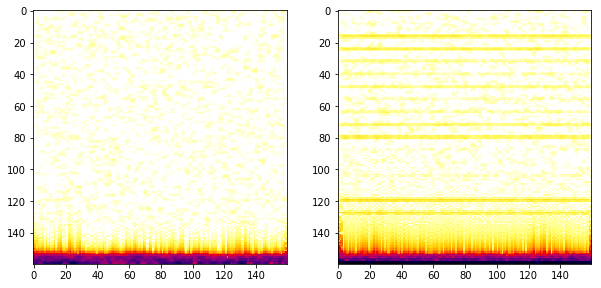

In [13]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.imshow(ch3_data[0])
f.add_subplot(1,2,2)
plt.imshow(ch4_data[0])

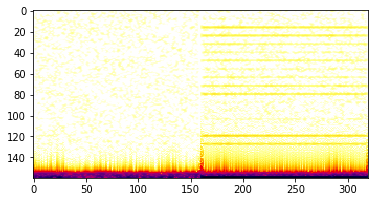

In [14]:
d = np.hstack((ch3_data[0], ch4_data[0]))
plt.imshow(d)

(320, 320, 3)


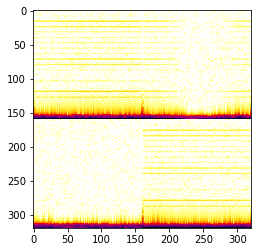

In [15]:
e = np.vstack((c,d))
print(e.shape)
plt.imshow(e)

## Apply on the whole training set

In [16]:
one_data = np.empty((1017,320,320,3), dtype=np.float32)
two_data = np.empty((1017,320,320,3), dtype=np.float32)
for x in range(0,len(ch1_data)):
    c = np.hstack((ch1_data[x], ch2_data[x]))
    d = np.hstack((ch3_data[x], ch4_data[x]))
    e = np.vstack((c,d))
    one_data[x] = e
    f = np.hstack((ch5_data[x], ch6_data[x]))
    g = np.hstack((ch7_data[x], ch8_data[x]))
    h = np.vstack((f,g))
    two_data[x] = h

In [17]:
print(one_data.shape)
print(two_data.shape)

(1017, 320, 320, 3)
(1017, 320, 320, 3)


In [18]:
p=np.concatenate((one_data, two_data))

In [19]:
p.shape

(2034, 320, 320, 3)

In [20]:
data = p

In [21]:
print("min of pixel : " + str(data[0].min()))
print("max of pixel : " + str(data[0].max()))

min of pixel : 0.0
max of pixel : 1.0


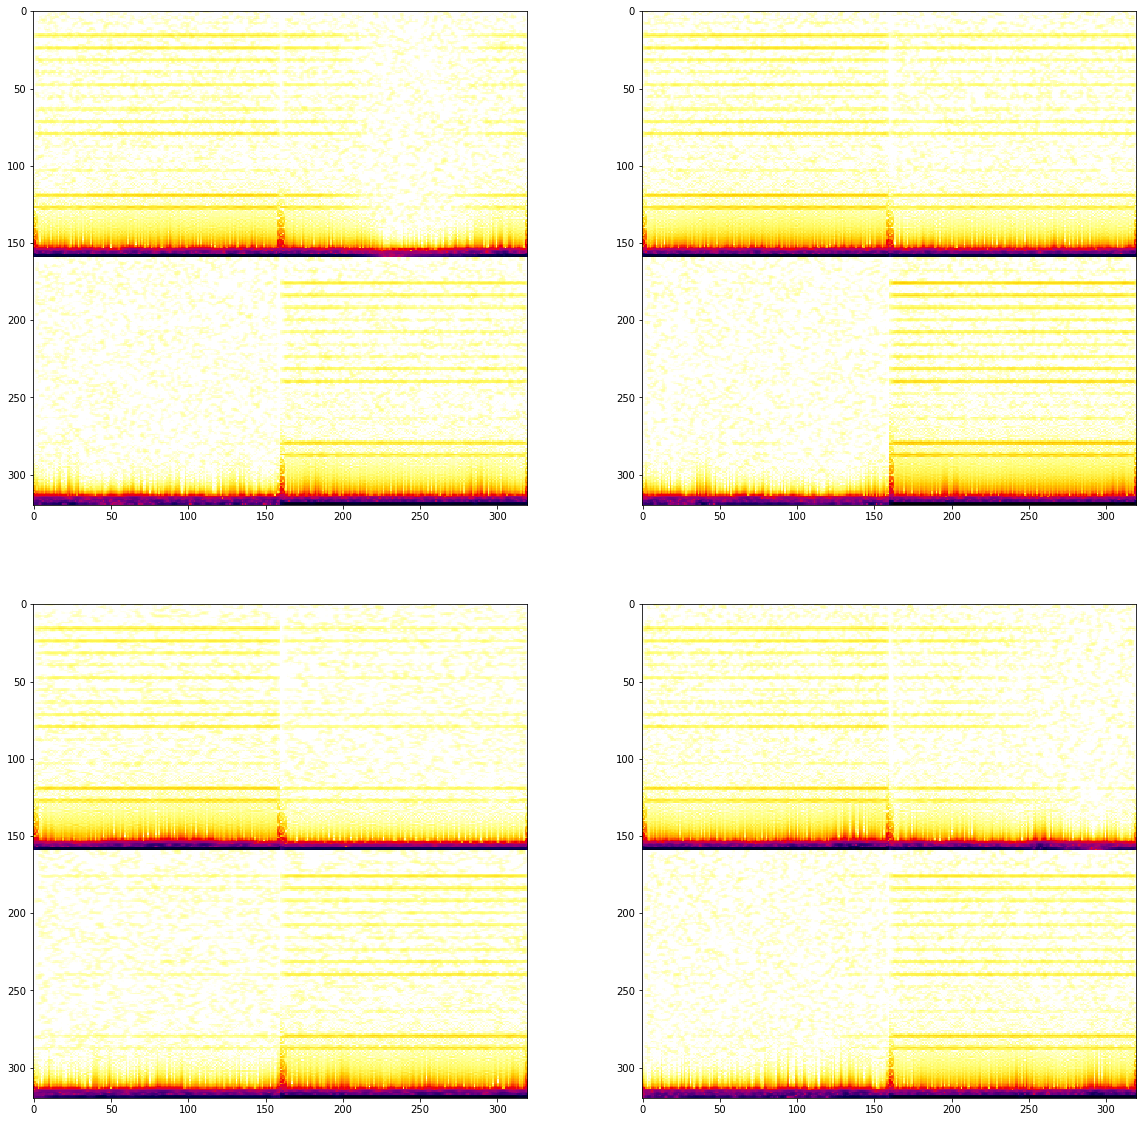

In [22]:
f = plt.figure(figsize=(20,20))
f.add_subplot(2,2,1)
plt.imshow(data[0])
f.add_subplot(2,2,2)
plt.imshow(data[1])
f.add_subplot(2,2,3)
plt.imshow(data[15])
f.add_subplot(2,2,4)
plt.imshow(data[1506])

# 1 2
# 3 4

In [23]:
#experiment
"""
a = np.empty((1,160,160,3), dtype=np.float32)
b = np.empty((1,160,160,3), dtype=np.float32)
a.fill(1)
b.fill(2)
c = np.hstack((a,b))
print(c.shape)
plt.imshow(c)
"""

'\na = np.empty((1,160,160,3), dtype=np.float32)\nb = np.empty((1,160,160,3), dtype=np.float32)\na.fill(1)\nb.fill(2)\nc = np.hstack((a,b))\nprint(c.shape)\nplt.imshow(c)\n'

## Create labels

In [24]:
#unique
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
    # print list 
    for x in unique_list: 
        print (x) 

In [25]:
# create labels
label = np.zeros((1017), dtype=int)
label = np.concatenate((label, np.ones((1017), dtype=int)))
#label = np.concatenate((label, np.repeat(1, 1017)))

print(label.shape)
print(unique(label))
#print(np.where(label==None))

(2034,)
0
1
None


In [26]:
unique, counts = np.unique(label, return_counts=True)
dict(zip(unique, counts))

{0: 1017, 1: 1017}

## Split

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size = 0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1627, 320, 320, 3), (407, 320, 320, 3), (1627,), (407,))

## Create Test File

In [28]:
test_train = x_train[:100]
test_label = y_train[:100]

In [29]:
#x_train[:200].shape
x_train = x_train[100:]
y_train = y_train[100:]

## Model

In [30]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={'x':x_train},
      y=y_train,
      batch_size=20,
      num_epochs=2,
      shuffle=True)

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':x_val},
    y=y_val,
    shuffle=False,
    num_epochs=2)

In [31]:
def cnn_model_function(features, labels, mode):
  
    input_layer = tf.reshape(features["x"], [-1, 320, 320, 3])

    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    conv3 = tf.layers.conv2d(
        inputs=pool2,
        filters=32,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    
    conv4 = tf.layers.conv2d(
        inputs=pool3,
        filters=64,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool3 = tf.layers.max_pooling2d(inputs=conv4, pool_size=[2, 2], strides=2)
    
    conv5 = tf.layers.conv2d(
        inputs=pool3,
        filters=128,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool4 = tf.layers.max_pooling2d(inputs=conv5, pool_size=[2, 2], strides=2)
    
    conv6 = tf.layers.conv2d(
        inputs=pool4,
        filters=128,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool5 = tf.layers.max_pooling2d(inputs=conv6, pool_size=[2, 2], strides=2)
    
    conv7 = tf.layers.conv2d(
        inputs=pool5,
        filters=256,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool6 = tf.layers.max_pooling2d(inputs=conv7, pool_size=[2, 2], strides=2)
    
    conv8 = tf.layers.conv2d(
        inputs=pool6,
        filters=128,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    pool7 = tf.layers.max_pooling2d(inputs=conv8, pool_size=[2, 2], strides=2)
    
    conv9 = tf.layers.conv2d(
        inputs=pool7,
        filters=128,
        kernel_size=[2, 2],
        padding="same",
        activation=tf.nn.relu)
    
    flat = tf.layers.flatten(conv9)
    dense = tf.layers.dense(inputs=flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    logits = tf.layers.dense(inputs=dropout, units=2)
    
    predictions = {
                "classes": tf.argmax(input=logits, axis=1),
                "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
        
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predictions['classes'], name='acc_op')
    tf.summary.scalar('accuracy', accuracy[1])
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        tf.identity(accuracy[1], name='train_acc')
        tf.summary.scalar('train_acc', accuracy[1])
        eval_metric_ops = {'train_acc':accuracy}
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, eval_metric_ops=eval_metric_ops)
    
    tf.identity(accuracy[1], name='val_accuracy')
    tf.summary.scalar('val_accuracy', accuracy[1])
    eval_metric_ops = {'val_accuracy':accuracy}
    
    return tf.estimator.EstimatorSpec(
                mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [32]:
tf.logging.set_verbosity(tf.logging.INFO)

OUTDIR = './i_10conv_9pool_pca'

cnn_classifier = tf.estimator.Estimator(model_fn=cnn_model_function, model_dir=OUTDIR)

file_writer = tf.summary.FileWriter(OUTDIR)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './i_10conv_9pool_pca', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0e3d524a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Train

In [34]:
def train_and_evaluate(estimator, epochs=50):
    for i in range(epochs):
        estimator.train(input_fn=train_input_fn, steps=20)
        file_writer = tf.summary.FileWriter(OUTDIR)
        estimator.evaluate(input_fn=eval_input_fn)

train_and_evaluate(cnn_classifier)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3101
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3101 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:loss = 0.22945683, step = 3102
INFO:tensorflow:Saving checkpoints for 3121 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:Loss for final step: 0.25864977.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-23-21:45:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3121
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-23-21:45:53
INFO:tensorflow:Saving dict for gl

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3241: ./i_10conv_9pool_pca/model.ckpt-3241
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3241
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3241 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:loss = 0.5509963, step = 3242
INFO:tensorflow:Saving checkpoints for 3261 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:Loss for final step: 0.2012662.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-23-21:51:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3261
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running lo

INFO:tensorflow:Saving dict for global step 3381: global_step = 3381, loss = 0.4133868, val_accuracy = 0.8255528
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3381: ./i_10conv_9pool_pca/model.ckpt-3381
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3381
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3381 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:loss = 0.24299276, step = 3382
INFO:tensorflow:Saving checkpoints for 3401 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:Loss for final step: 0.117168404.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-23-21:57:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring paramet

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-23-22:03:08
INFO:tensorflow:Saving dict for global step 3521: global_step = 3521, loss = 0.37107465, val_accuracy = 0.83538085
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3521: ./i_10conv_9pool_pca/model.ckpt-3521
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3521
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3521 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:loss = 0.11358712, step = 3522
INFO:tensorflow:Saving checkpoints for 3541 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:Loss for final step: 0.19301765.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting 

INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3661
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-23-22:09:09
INFO:tensorflow:Saving dict for global step 3661: global_step = 3661, loss = 0.3583944, val_accuracy = 0.85257983
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3661: ./i_10conv_9pool_pca/model.ckpt-3661
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3661
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3661 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:loss = 0.06293534, step = 3662
INFO:tensorflow:Saving checkpoints for 3681 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:Loss for final

INFO:tensorflow:Starting evaluation at 2018-11-23-22:14:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3801
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-23-22:15:09
INFO:tensorflow:Saving dict for global step 3801: global_step = 3801, loss = 0.3893474, val_accuracy = 0.85503685
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3801: ./i_10conv_9pool_pca/model.ckpt-3801
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3801
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3801 into ./i_10conv_9pool_pca/model.ckpt.
INFO:tensorflow:loss = 0.11558013, step = 3802
INFO:tensorflow:

INFO:tensorflow:Loss for final step: 0.36177188.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-23-22:20:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3941
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-23-22:21:09
INFO:tensorflow:Saving dict for global step 3941: global_step = 3941, loss = 0.3706568, val_accuracy = 0.87469286
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3941: ./i_10conv_9pool_pca/model.ckpt-3941
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-3941
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving 

KeyboardInterrupt: 

## Test

In [35]:
#get a test_data

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':test_train},
    shuffle=False,
    num_epochs=2)

generator = cnn_classifier.predict(input_fn=predict_input_fn)

preds = []
b = []
for i in range(len(test_train)):
    a = next(generator)
    preds.append(a['classes'])
    b.append(i)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./i_10conv_9pool_pca/model.ckpt-4061
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, test_label)
# Exp1.
# With 6 Convnets
# before overfit, at 6000 steps, it was 0.7
# then, now it's 8000 steps, and the validation and accuracy started divering. 0.61

# Exp2.
# Now, with 7 ConvNets,
# at 6000 Steps, I got 79%
# at 7000 Steps, Still 79%
# at 7500 Steps, Still 79%
# at 8000 Steps, Still 79%
# at 8500 Steps, Decreased to 78% (Might be a sign of overfit)
# at 9000 Steps, back to 79% (accuracy rate still seems to go up, let's try just until 10,000)
# at 10,000 Steps, back to 78%. Seems to be converging.

# Exp3.
# Finally, with 18 ConvNets, but Pooling Layers between not in everything but four max_pooling in between different
# size-kernel Conv Nets and last pooling layer with average.
# at 1850 Steps, decided that this will not work.

# Exp4.
# Again, this time, 9 ConvNets, and 7 Max-pooling Layers, and number of nodes gradually increased
# from 64, 128, 256, and the kernel size is one (5,5), then 2 (3,3), then 5 (2,2)
# at 2000 Steps, 71%
# at 3000 Steps, 73%
# at 4000 Steps, 73% on test accuracy but training acc and valid acc -> 81% / 75%


# The experiments above are done with MERGED sets (4 wav files into 1, then spectro)
# whereas, the below are done with STICHTED sets (4 wav files into 4 spectro, then stictched as in EDA)

# Exp5.
# New: Back to 7Conv + 6Max-pool (which gave 79%) and tweak other values such as nodes and batch size
# In the range of 63% and 89% depending on the dataset. (3 validation sets (not enough datasets to test, only 33 each))

# Exp6.
# Lastly, 9Conv + 7Max-Pool with 32,64,128,256 number of nodes and [3,3]->[2,2] kernel sizes for convolutions,
# and for max-pooling -> regular [2,2] poolying layers

# By running upto 4000 Steps, but with way more nodes and more adequate amont of layers, It achieved 86% accuracy.
# Also, cut it at 4000 Steps, because the loss curve of validation and training started diverging.

0.86

In [37]:
preds

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0]